In [43]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
import statsmodels.api as sm 
from sklearn import linear_model

In [45]:
df = pd.read_csv('ranking_uni.csv')

In [46]:
df.drop(['year','link','logo','research_output',],
       axis=1, inplace=True)

# Final Evaluation IN2039.101
*Carlos Bland A00827176*

# Describe Data Base
The data base presented shows the ranking of the top 200 universities world wide for th year 2022.

Reference obtained from Kaggle: QS Quacquarelli Symonds Limited, World University Rankings 2022

## Variables

*   university: Name of the university (Qualitative Nominal)
*   rank_display: Rank place of the university (Quantitative Discrete)
*   score: Rank from 0 to 100 as of quality of university (Quantitative Continuous) 
*   country: Country where the university is located (Qualitative Nominal)
*   international_students: Number of students currently attending that are international (Quantitative Discrete)
*   student_faculty_ratio: establishes the number of students there are by every faculty member (Quantitative Discrete)




## What countries have universities in the top 200 and what are the countries with more universities in the ranking?

In [47]:
pivot1 = pd.pivot_table(df,
               index = ['country'],
               values = ['university'],
               aggfunc = 'count',
              )
pivot1

,university
country,
Argentina,1
Australia,13
Austria,2
Belgium,3
Brazil,1
Canada,8
Chile,2
China (Mainland),7
Denmark,3


Text(0.5, 0, 'Country')

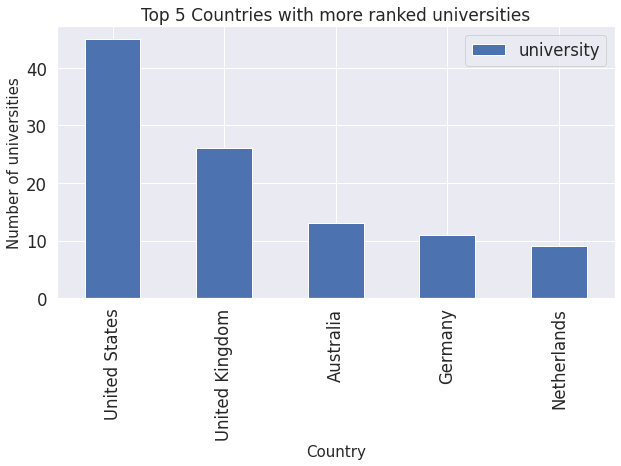

In [48]:
top = pivot1.sort_values(['university'], ascending = False, axis = 0)
top5=top.head(5)
top5.plot(kind='bar',
         figsize=(10,5))

plt.title('Top 5 Countries with more ranked universities',fontsize = 17)
plt.ylabel('Number of universities', fontsize = 15)
plt.xlabel('Country', fontsize = 15)

In [49]:
top5

,university
country,
United States,45
United Kingdom,26
Australia,13
Germany,11
Netherlands,9


## Conclusion
There are 35 countries with at least one university in the ranking.

The top 5 countries with more universities:

- United States (45)
- United Kingdom (26)
- Australioa (13)
- Germany (11)
- Netherlands (9)

## What porcentage does each region has of all 200 universities?

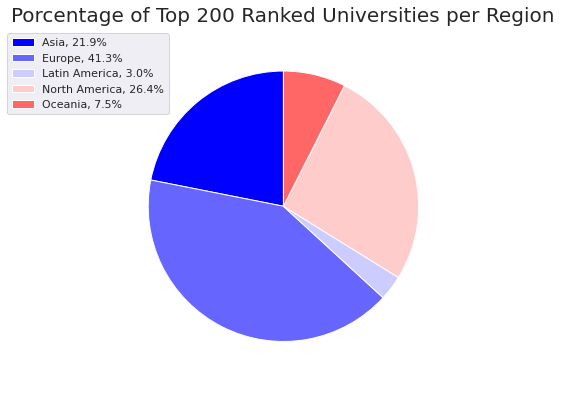

In [50]:
sizes = [44, 83, 6, 53, 15]
labels = ["Asia", "Europe", "Latin America","North America","Oceania"]
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)
theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])
ax1.set_title('Porcentage of Top 200 Ranked Universities per Region', fontsize = 20)
_, _ = ax1.pie(sizes, startangle=90)
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
plt.show()

## Conclusion
The region with the highest porcentage is Europe with 41.3% and the one with the lowest Latin
America with 3%

# Is there any outliers the Student/Faculty Ratio numbers from every university)

Text(0.5, 1.0, 'Box Plot Student/Faculty ratio')

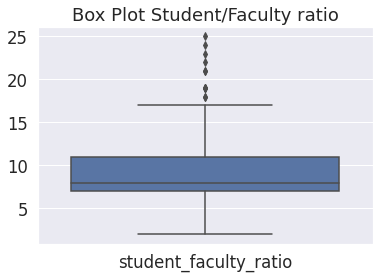

In [51]:
sns.boxplot(data = df.loc[:, ['student_faculty_ratio']],
           )
plt.title('Box Plot Student/Faculty ratio')

# Conclusion
In the Student Faculty ratio we are able to identify 7 outliers from the 200 universities which would indicate a suggested revision of the dataset in the analized column. 

# What are the variables with the best correlation to predict the score with the variables on the database?

In [52]:
df.corr()

,rank_display,score,student_faculty_ratio,international_students,faculty_count
rank_display,1.000000,-0.972926,0.401406,-0.325993,-0.334970
score,-0.972926,1.000000,-0.418900,0.304919,0.317706
student_faculty_ratio,0.401406,-0.418900,1.000000,0.203993,-0.252086
international_students,-0.325993,0.304919,0.203993,1.000000,0.403071
faculty_count,-0.334970,0.317706,-0.252086,0.403071,1.000000


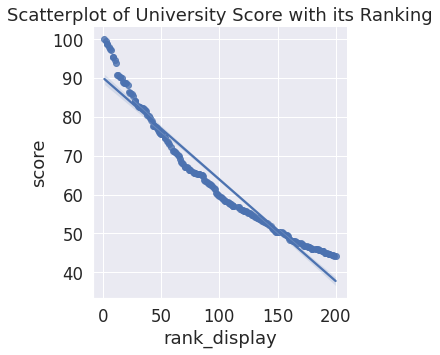

In [53]:
sns.lmplot(y= 'score',
           x= 'rank_display',
           data = df,)
plt.title('Scatterplot of University Score with its Ranking')
plt.show()

# Conclusion

The ranking of the university as it wa especulated gave a accurate correlation with the score given to the university, the second best correlation is with the student_faculty_ratio.

# What is the best model to predict the score of the university that you can obtain from all the variables given? (except ranking)

In [54]:
modelA = sm.OLS.from_formula('score ~ student_faculty_ratio', data = df)#first test with student/faculty ratio
resultA = modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     42.35
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           6.06e-10
Time:                        14:08:51   Log-Likelihood:                -815.70
No. Observations:                 201   AIC:                             1635.
Df Residuals:                     199   BIC:                             1642.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                78.1420      2.405     32.487      0.000      73.399      82.885
student_faculty_ratio    -1.5441      0.237     -6.508      0.000      -2.012      -1.076
==============================================================================
Omnibus:                       30.713   Durbin-Watson:                   0.303
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.224
Skew:                           0.333   Prob(JB):                      0.00365
Kurtosis:                       2.053   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show>

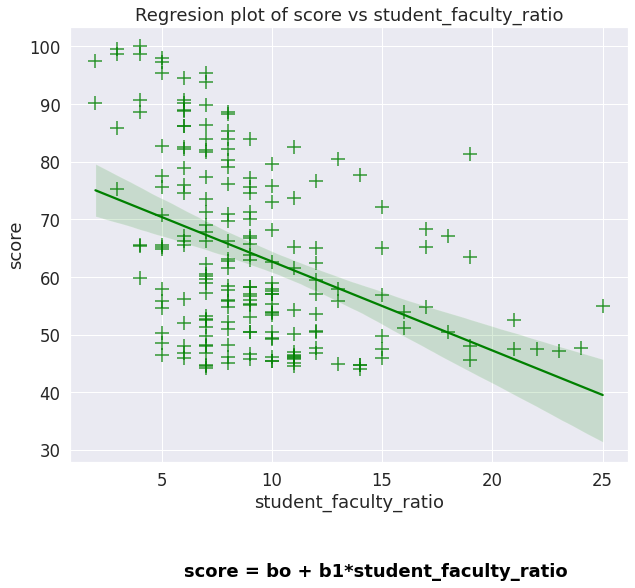

In [55]:
plt.figure(figsize= (10,8)) #tamaño de la tabla 
sns.set(font_scale = 1.50) #tamaño de las letras
ax = sns.regplot(x = 'student_faculty_ratio',
                 y = 'score',
                 data = df,
                 color = 'green', #color de la tabla 
                 marker = '+', #forma del marcador 
                 scatter_kws = {'s':200} #tamaño del marcador
)
ax.set(xlabel = 'student_faculty_ratio',
       ylabel = 'score') #poner marca de que va en cada axia

ax.text(6,8, 'score = bo + b1*student_faculty_ratio',
        horizontalalignment= 'left', size = 'medium', color = 'black',
        weight = 'semibold')
ax.set_title('Regresion plot of score vs student_faculty_ratio') #titulo de la grafica 
plt.show

plt.show
#Tabla Regresion visualizar los datos ajustados comparando con los observados 

We observe residuals too big so we have to include more prediction values.

In [56]:
modelB = sm.OLS.from_formula('score ~ student_faculty_ratio+international_students', data = df)
resultB = modelB.fit()
resultB.summary()
#New model with extra prediction variable 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     49.76
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           3.11e-18
Time:                        14:08:52   Log-Likelihood:                -794.17
No. Observations:                 201   AIC:                             1594.
Df Residuals:                     198   BIC:                             1604.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 73.0736      2.288     31.933      0.000      68.561      77.586
student_faculty_ratio     -1.8504      0.218     -8.477      0.000      -2.281      -1.420
international_students     0.0012      0.000      6.878      0.000       0.001       0.002
==============================================================================
Omnibus:                       13.372   Durbin-Watson:                   0.703
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.736
Skew:                           0.424   Prob(JB):                      0.00769
Kurtosis:                       2.333   Cond. No.                     2.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusion
After different interation to obtain the best prediction model we can conclude that the variables in the data base are not optimal and can't create an acceptable model. 

The best model gave R-squared value of 0.334 and was created with the only two variables that made a differance in the determinant that are the student/faculty ratio and the number of international students:

score=b0+b1student_faculty_ratio+b2international_students

score=73.0736-1.8504*student_faculty_ratio+0.0012international_students



# Using the residuals of the previous model, from the numeber of international students and student/faculty ratio what would be the score of the best and worst university in the ranking?

In [57]:
RESI_B = resultB.resid #para ver todos los resiudos de volada 
RESI_B

0      29.704956
1      21.514163
2      26.369839
3      23.205403
4      26.894263
         ...    
196    -6.810951
197   -10.284126
198   -17.078141
199   -16.951765
200   -13.752893
Length: 201, dtype: float64

<function matplotlib.pyplot.show>

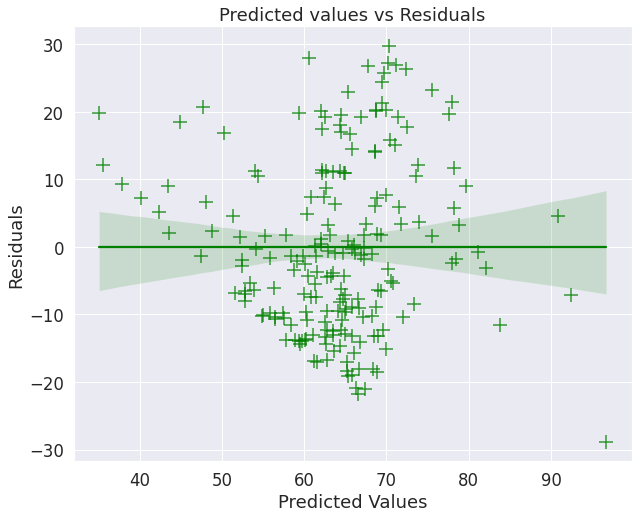

In [58]:
predicted_values = resultB.fittedvalues.to_frame()
plt.figure(figsize= (10,8)) #tamaño de la tabla 
sns.set(font_scale = 1.50) #tamaño de las letras
ax = sns.regplot(x = predicted_values,
                 y = RESI_B,
                 data = df,
                 color = 'green', #color de la tabla 
                 marker = '+', #forma del marcador 
                 scatter_kws = {'s':200} #tamaño del marcador
)
ax.set(xlabel = 'Predicted Values',
       ylabel = 'Residuals')
ax.set_title('Predicted values vs Residuals')
plt.show

In [59]:
predicted_values = predicted_values.rename(columns = {0:'Score'})
predicted_values = predicted_values.reset_index()
predicted_values

,index,Score
0,0,70.295044
1,1,77.985837
2,2,72.330161
3,3,75.494597
4,4,71.105737
...,...,...
196,196,51.610951
197,197,54.884126
198,198,61.578141
199,199,61.151765


# Conclusion 

After analysing the residuals behavior with the predicted results we are able to say that the predictions are not going to be optimal as the residuals are not following the predicted values line given us differance of up to ±25 in the scores predicted. 


Using the created model the number one ranked university has a score of **77.985837** (real of 100) and the worst a score of **57.852893** (real of 44.1)